# Importing Libraries

In [1]:
# data processing
import pandas as pd

#Linear Algebra
import numpy as np

#Data Visualization
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

#algorithms
import sklearn 
from sklearn import model_selection 
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression,LogisticRegression,RidgeCV
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score
from sklearn.preprocessing import StandardScaler,LabelEncoder

from sklearn.model_selection import train_test_split,cross_val_predict

#datasets
from sklearn import datasets


import warnings
warnings.filterwarnings('ignore')

# Getting Data

In [2]:
#reading data
bigmart=pd.read_csv('Bigmart sales data.csv')

bigmart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Data Exploration

In [3]:
bigmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


* Here we can observe that Item_identifier,item_fat_content,item_type,outlet_identifier,outlet_size,outlet_location_type,outlet_type are objects.
* Other than these features all others are Integers and Floating features.

In [4]:
bigmart.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


1. From here we can observe that minimum item_weight is 4.55 and maximum item_weight is 21.35.
2. Minimum item_visibility is 0 and maximum item_visibility is 0.32
3. Minimum item_outlet_sales is 33 and maximum item_outlet_sales is 13086
4. The lower ‘count’ of Item_Weight and Item_Outlet_Sales confirms the findings from the missing value check.

Thus we can see that data has same #columns but rows equivalent to both test and train. One of the key challenges in any data set is missing values. Lets start by checking which columns contain missing values.

In [5]:
bigmart.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Here you can see that there is a null values present in Item_outlet_sales ,Item_weight and  Outlet_size.

Moving to nominal (categorical) variable, lets have a look at the number of unique values in each of them.

In [6]:
bigmart.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

This tells us that there are 1559 products and 10 outlets/stores (which was also mentioned in problem statement). Another thing that should catch attention is that Item_Type has 16 unique values. Let’s explore further using the frequency of different categories in each nominal variable. I’ll exclude the ID and source variables for obvious reasons.

In [7]:
#Filter categorical variables
categorical_columns = [x for x in bigmart.dtypes.index if bigmart.dtypes[x]=='object']
#Exclude ID cols and source:
categorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier','Outlet_Identifier','source']]
#Print frequency of categories
for col in categorical_columns:
    print ('\nFrequency of Categories for varible %s'%col)
    print (bigmart[col].value_counts())


Frequency of Categories for varible Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for varible Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Frequency of Categories for varible Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Frequency of Categories for varible Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

F

##### The output gives us following observations:

* Item_Fat_Content: Some of ‘Low Fat’ values mis-coded as ‘low fat’ and ‘LF’. Also, some of ‘Regular’ are mentioned as‘regular’.
* Item_Type: Not all categories have substantial numbers. It looks like combining them can give better results.
* Outlet_Type: Supermarket Type2 and Type3 can be combined. But we should check if that’s a good idea before doing it.


# Data Cleaning

This step typically involves imputing missing values and treating outliers. Though outlier removal is very important in regression techniques, advanced tree based algorithms are impervious to outliers. So I’ll leave it to you to try it out. We’ll focus on the imputation step here, which is a very important step.

## Imputing Missing Values

Item_Outlet_sales ,Outlet_size and Item_Weight has missing values going to working on it .

In [8]:
bigmart['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [9]:
bigmart['Outlet_Size'].isnull().sum()

2410

From here i'm going to fill with most common one .

In [10]:
bigmart['Outlet_Size'].fillna('Medium',inplace=True)

In [11]:
#let's check data again weather null data is present or not
bigmart['Outlet_Size'].isnull().sum()

0

In [12]:
bigmart['Item_Weight'].isnull().sum()

1463

Here we can observe one thing data contains null data and it's better to working on it.

And i'm going to fill these missing values with mean value.

In [13]:
bigmart['Item_Weight'].fillna(bigmart['Item_Weight'].mean(),inplace=True)

In [14]:
#let's check data once again weather null values present or not 
bigmart['Item_Weight'].isnull().sum()


0

Now it's clear that there is no missing values .

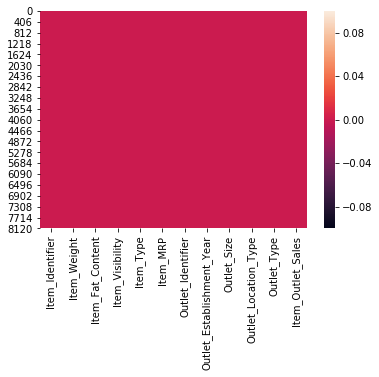

In [15]:
#check once again weather still null values present or not
sns.heatmap(bigmart.isnull())

In [16]:
bigmart['Item_Outlet_Sales'].fillna(bigmart['Item_Outlet_Sales'].median(),inplace=True)

In [17]:
bigmart['Item_Outlet_Sales'].isnull().sum()

0

Now it's done

# Feature Engineering

In item_visibility we can observe minimum value is zero in the sense it contains lot of zeros it does't make sense ,so it's better to fill with mean visibility.

In [18]:
bigmart['Item_Visibility'].replace(0,bigmart['Item_Visibility'].mean(),inplace=True)

let's check minium Item_visibility once.

In [19]:
bigmart['Item_Visibility'].describe()

count    8523.000000
mean        0.070213
std         0.048742
min         0.003575
25%         0.033085
50%         0.062517
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

now here you can see value has been changed ,it's good sign .

In [20]:
bigmart['Item_Identifier'].value_counts()

FDG33    10
FDW13    10
FDW49     9
FDO19     9
DRN47     9
         ..
DRF48     1
FDT35     1
FDY43     1
FDK57     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [21]:
#Get the first two characters of ID:
bigmart['Item_Type_Combined'] = bigmart['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
bigmart['Item_Type_Combined'] = bigmart['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
bigmart['Item_Type_Combined'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Type_Combined, dtype: int64

In [22]:
bigmart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,Food
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable


##### Determine the years of operation store

In [23]:
bigmart['years']=2013-bigmart['Outlet_Establishment_Year']
bigmart['years'].value_counts()

28    1463
26     932
14     930
9      930
16     930
11     929
4      928
6      926
15     555
Name: years, dtype: int64

##### Modify categories of Item_Fat_Content

In [24]:
#Change categories of low fat:
print('Original Categories:')
print(bigmart['Item_Fat_Content'].value_counts())

Original Categories:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


In [25]:
print('\nModified Categories:')
bigmart['Item_Fat_Content'] = bigmart['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})
bigmart['Item_Fat_Content'].value_counts()


Modified Categories:


Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [26]:
#Mark non-consumables as separate category in low_fat:
bigmart.loc[bigmart['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
bigmart['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

##### Numerical and One-Hot Coding of Categorical variables

In [27]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
bigmart['Outlet'] = le.fit_transform(bigmart['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet','Item_Type']
le = LabelEncoder()
for i in var_mod:
    bigmart[i] = le.fit_transform(bigmart[i])

In [28]:
bigmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 15 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null int32
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null int32
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  8523 non-null int32
Outlet_Location_Type         8523 non-null int32
Outlet_Type                  8523 non-null int32
Item_Outlet_Sales            8523 non-null float64
Item_Type_Combined           8523 non-null int32
years                        8523 non-null int64
Outlet                       8523 non-null int64
dtypes: float64(4), int32(6), int64(3), object(2)
memory usage: 799.2+ KB


In [29]:
#going to drop Out_identifier
bigmart.drop('Outlet_Identifier',axis=1,inplace=True)

In [30]:
bigmart.drop('Item_Identifier',axis=1,inplace=True)

In [31]:
bigmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null int32
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null int32
Item_MRP                     8523 non-null float64
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  8523 non-null int32
Outlet_Location_Type         8523 non-null int32
Outlet_Type                  8523 non-null int32
Item_Outlet_Sales            8523 non-null float64
Item_Type_Combined           8523 non-null int32
years                        8523 non-null int64
Outlet                       8523 non-null int64
dtypes: float64(4), int32(6), int64(3)
memory usage: 666.0 KB


Now it's clear that every feature is in int and floating format.

# Check Distribution of Skewness

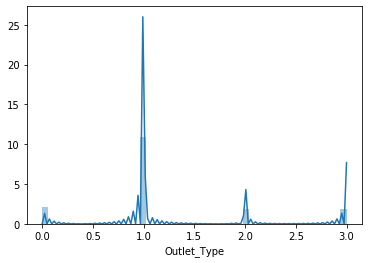

In [32]:
sns.distplot(bigmart['Outlet_Type'])

In [33]:
collist=bigmart.columns
ncol=12
nrows=10

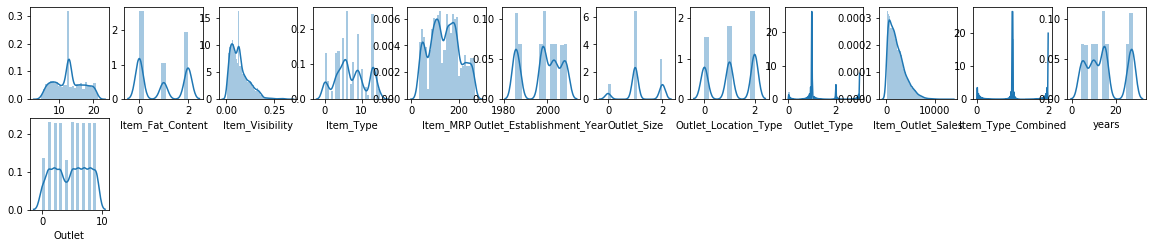

In [34]:
plt.figure(figsize=(20,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(bigmart[collist[i]])

In [35]:
bigmart.skew()

Item_Weight                  0.090561
Item_Fat_Content             0.211160
Item_Visibility              1.286877
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Outlet_Size                 -0.087072
Outlet_Location_Type        -0.209093
Outlet_Type                  0.927438
Item_Outlet_Sales            1.177531
Item_Type_Combined           0.114510
years                        0.396641
Outlet                      -0.059861
dtype: float64

In [36]:
x=bigmart.drop('Item_Outlet_Sales',axis=1)
x.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Combined,years,Outlet
0,9.30,0,0.016047,4,249.8092,1999,1,0,1,1,14,9
1,5.92,2,0.019278,14,48.2692,2009,1,2,2,0,4,3
2,17.50,0,0.016760,10,141.6180,1999,1,0,1,1,14,9
3,19.20,2,0.066132,6,182.0950,1998,1,2,0,1,15,0
4,8.93,1,0.066132,9,53.8614,1987,0,2,1,2,26,1


In [37]:
y=bigmart['Item_Outlet_Sales']
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

# Building a model

In [38]:
x.shape

(8523, 12)

In [39]:
y.shape

(8523,)

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=41)

In [41]:
x_train.shape

(6392, 12)

In [42]:
y_train.shape

(6392,)

In [43]:
x_test.shape

(2131, 12)

In [44]:
y_test.shape

(2131,)

In [45]:
#Applying Standard Scaling to get optimized result
sc=StandardScaler()

In [46]:
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [47]:
lr=LinearRegression(normalize=True)
rfr=RandomForestRegressor()
rg=RidgeCV(alphas=(0.01, 0.1, 1.0, 10.0), normalize=True)
dtr=DecisionTreeRegressor()

In [48]:
#prepare models
models=[]
models.append(('LinearRegression',lr))
models.append(('RandomForestRegressor',rfr)) 
models.append(('RidgeCV',rg))
#evaluate each model
Model=[]
Score=[]
MAE=[]
MSE=[]
RMSE=[]
RSquare=[]
for name,model in models:
    print('***********************',name,'************')
    Model.append(name)
    print('\n')
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    sr=model.score(x_train,y_train)
    print('score',sr)
    Score.append(sr*100)
    print('\n')
    print('Performance Measures:')
    mae=metrics.mean_absolute_error(y_test, pred)
    print('MAE',mae)
    MAE.append(mae)
    mse=metrics.mean_squared_error(y_test, pred)
    print('MSE',mse)
    MSE.append(mse)
    rmse=np.sqrt(metrics.mean_squared_error(y_test, pred))
    print('RMSE',rmse)
    RMSE.append(rmse)
    rsquare=metrics.r2_score(y_test,pred)
    print('R-square',rsquare)
    RSquare.append(rsquare)

*********************** LinearRegression ************


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)


score 0.5186192097898914


Performance Measures:
MAE 926.6018593672447
MSE 1552408.8005606479
RMSE 1245.9569818258767
R-square 0.4853021210424605
*********************** RandomForestRegressor ************


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)


score 0.9177244419245345


Performance Measures:
MAE 851.1580638854997
MSE 1454346.9298721522
RMSE 1205.9630715209119
R-square 0.5178143284144809
*********************** RidgeCV ************


In [49]:
result=pd.DataFrame({'models':Model,'score':Score,'MAE':MAE,'MSE':MSE,'RMSE':RMSE,'RSquare':RSquare},columns=['models','score','MAE','MSE','RMSE','RSquare'])
result

,models,score,MAE,MSE,RMSE,RSquare
0,LinearRegression,51.861921,926.601859,1.552409e+06,1245.956982,0.485302
1,RandomForestRegressor,91.772444,851.158064,1.454347e+06,1205.963072,0.517814
2,RidgeCV,51.853121,925.913833,1.552302e+06,1245.913939,0.485338


# Predicting Data

In [50]:
pred=rfr.predict(x_test)
print("predicted target",pred)
print("actual target",y_test)

predicted target [1195.37732  590.43144  730.7155  ... 2106.85752 2157.05884 2753.4159 ]
actual target 5024    1328.2710
5341    1018.6740
7599     334.2316
4213    2348.9424
7256    8323.8316
          ...    
6691    1567.9590
4807    1874.8928
1007    2059.9852
1905    2181.1608
3774    3271.0754
Name: Item_Outlet_Sales, Length: 2131, dtype: float64


# Saving  Model

In [51]:
x=pd.DataFrame(pred)
x.to_csv('rfc_bigmart.csv')

In [52]:
from sklearn.externals import joblib
#save the model as a pickle in a file
joblib.dump(rfr,'bigmart.obj')
#load the model from a file
rfr_from_joblib=joblib.load('bigmart.obj')
#use the loaded model to make prediction
rfr_from_joblib.predict(x_test)

array([1195.37732,  590.43144,  730.7155 , ..., 2106.85752, 2157.05884,
       2753.4159 ])